In [10]:
import pandas as pd
import numpy as np


In [11]:
data_dir = "./data/demo_r_gind3_1_Data.csv"

In [12]:
data = pd.DataFrame.from_csv(data_dir, encoding = "ISO-8859-1")
data.index = pd.Index(map(lambda x: x.year, data.index))
data = data.reset_index()
data = data.drop([data.columns[3], data.columns[5]], axis=1)
data = data.rename(columns={"index": "Year"})
data.head()

,Year,GEO,GEO_LABEL,Value
0,2000,BE,Belgium,"10,239,085"
1,2000,BE1,Région de Bruxelles-Capitale / Brussels Hoofds...,"959,318"
2,2000,BE10,Région de Bruxelles-Capitale / Brussels Hoofds...,"959,318"
3,2000,BE100,Arr. de Bruxelles-Capitale / Arr. van Brussel-...,"959,318"
4,2000,BE2,Vlaams Gewest,"5,940,251"


In [13]:
# Get BE Year 2000
data[(data["Year"] == 2000) & (data["GEO"] == "BE")].iloc[0].Value

'10,239,085'

In [14]:
# Get BE Year 2001
data[(data["Year"] == 2001) & (data["GEO"] == "BE")].iloc[0].Value

'10,263,414'

In [15]:
#data["Value"] = [int(data["Value"][i].replace(',','0').replace(':','0')) for i in data.index if data["Value"][i].replace(',','0').replace(':','0')]

In [16]:
list_per_code = data.groupby("GEO").agg(lambda x: list(x))
list_per_code = list_per_code.drop(["Year", "GEO_LABEL"], axis=1)
list_per_code.head()

,Value
GEO,
AL,"[3,058,497, 3,063,318, 3,057,018, 3,044,993, 3..."
AL0,"[:, :, 3,057,018, 3,044,993, 3,034,231, 3,019,..."
AL01,"[:, :, :, :, :, :, :, :, :, :, :, :, 861,058, ..."
AL011,"[:, :, :, :, :, :, :, :, :, :, :, :, 140,956, ..."
AL012,"[:, :, :, :, :, :, :, :, :, :, :, :, 271,947, ..."


In [17]:
# Get AL year 2001
list_per_code.loc["BE"][0][1]

'10,263,414'

In [18]:
non_empty_ids = [i for i in list_per_code.index if ':' not in list_per_code['Value'][i]]
print(len(list_per_code))
print(len(non_empty_ids))
list_per_code_nonempty = list_per_code.loc[non_empty_ids]

2238
1323


In [19]:
sample = list_per_code_nonempty.sample(n=50)

### Nut3 plots

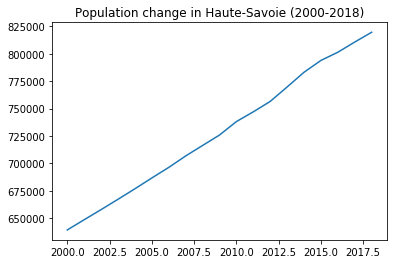

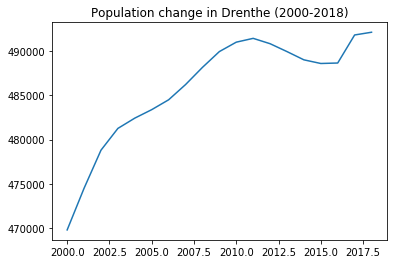

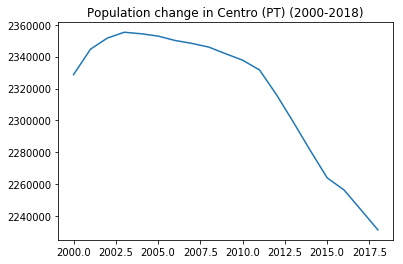

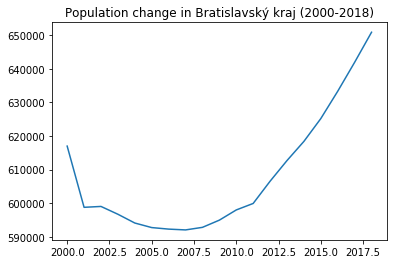

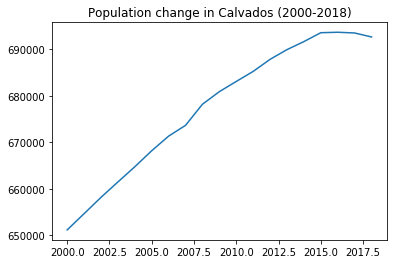

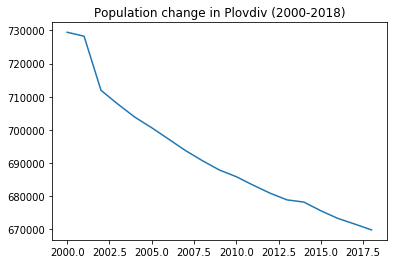

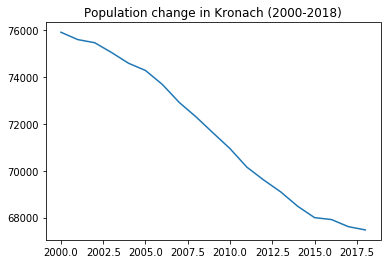

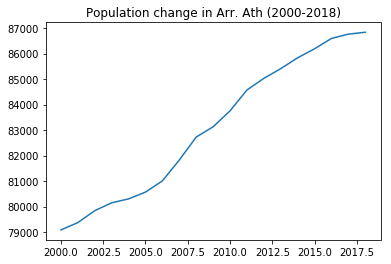

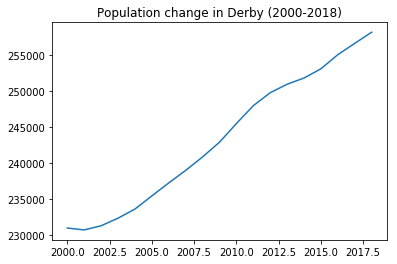

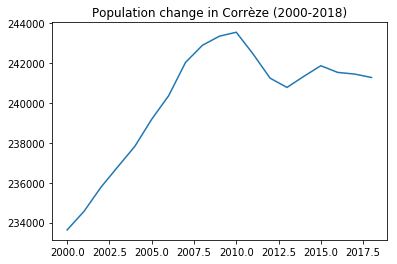

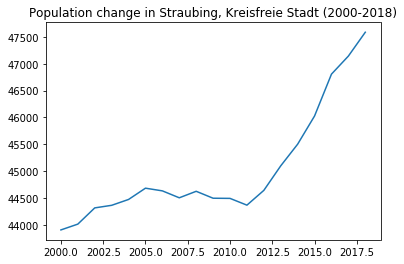

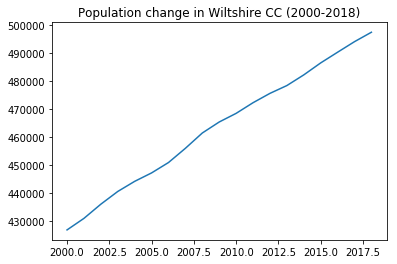

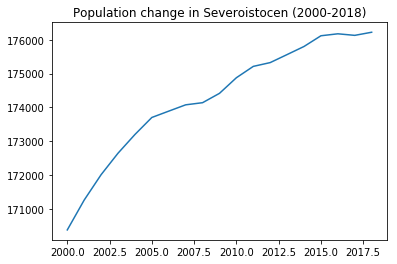

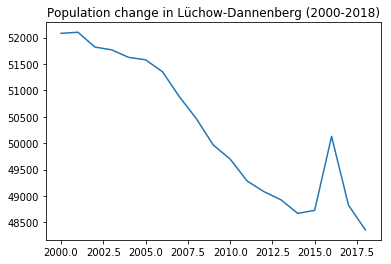

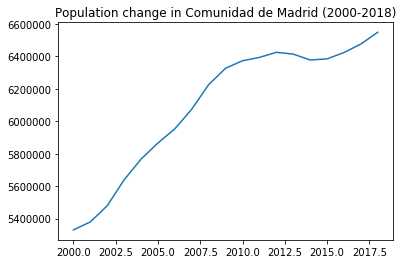

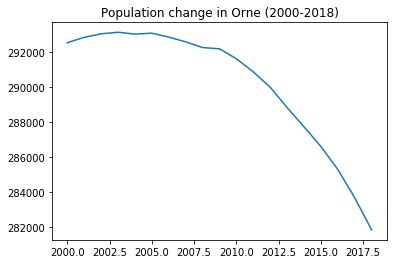

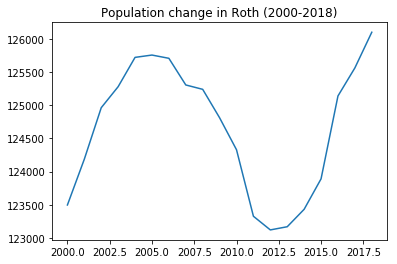

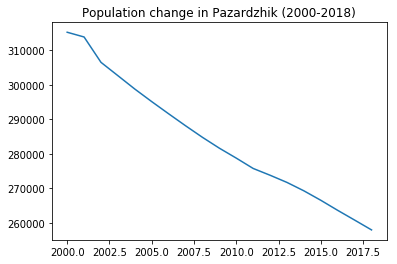

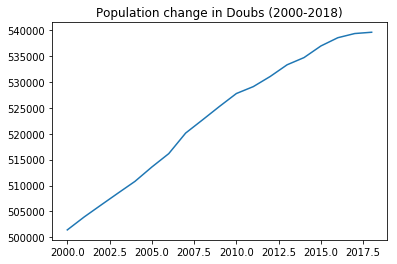

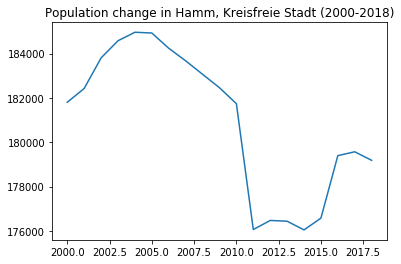

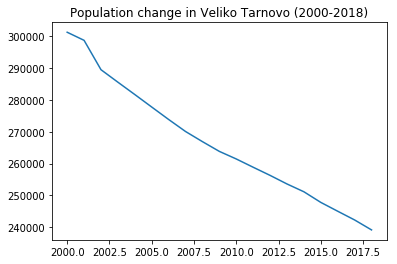

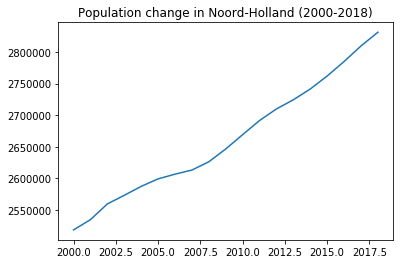

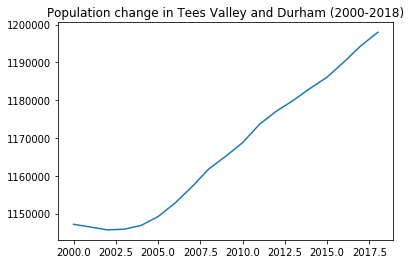

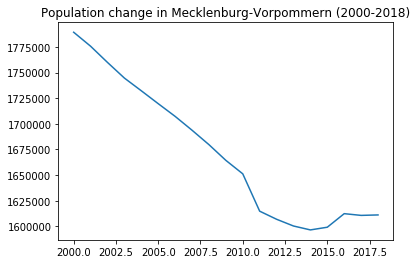

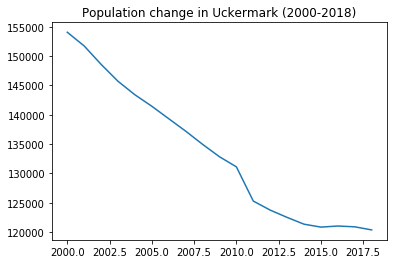

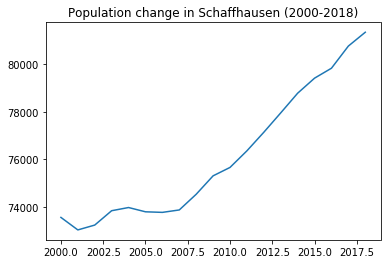

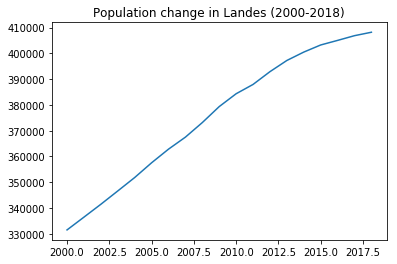

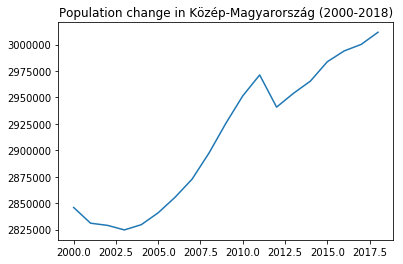

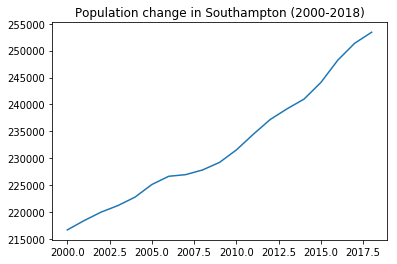

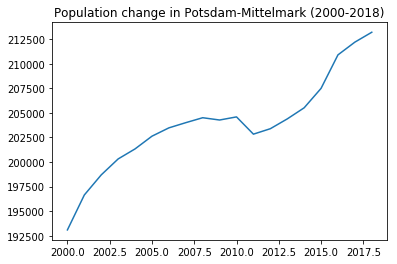

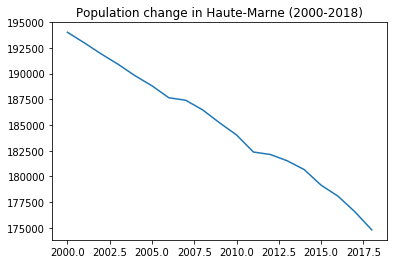

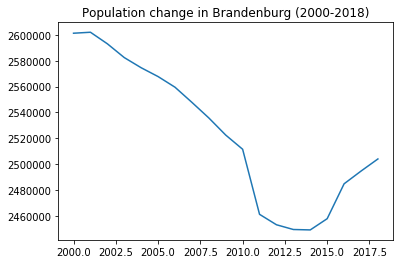

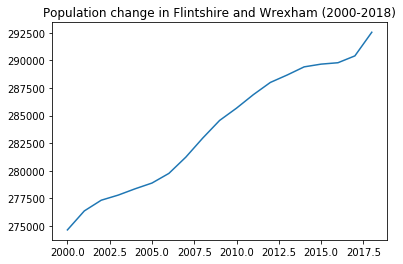

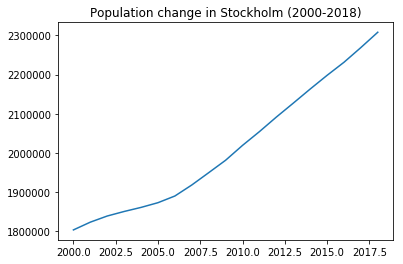

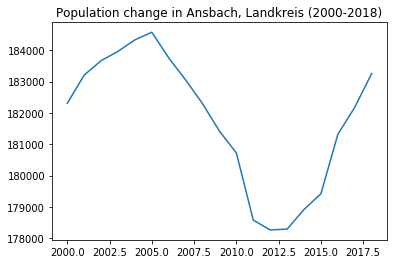

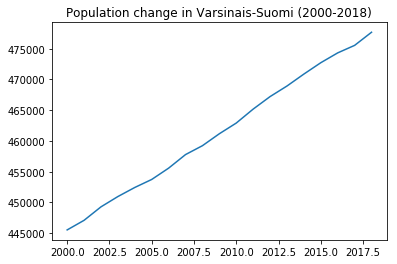

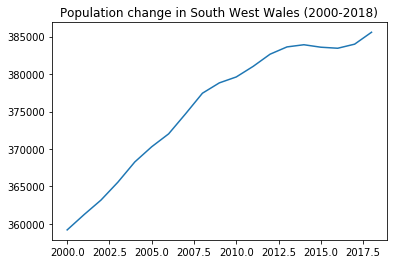

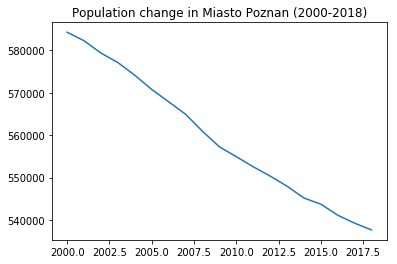

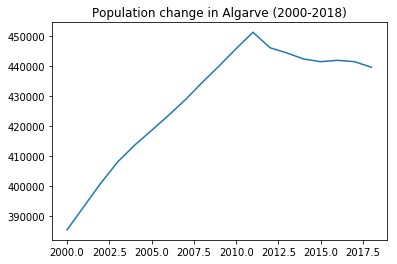

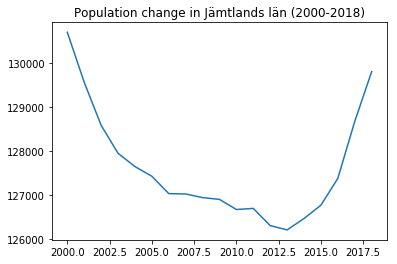

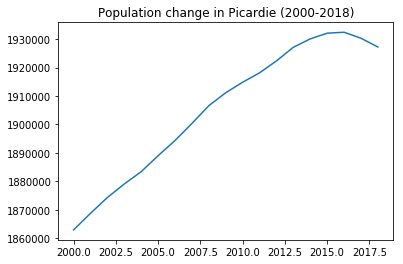

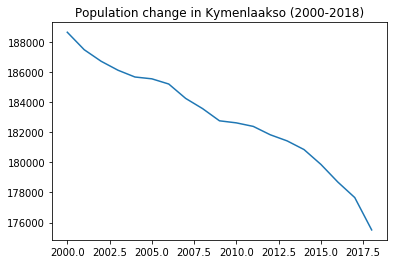

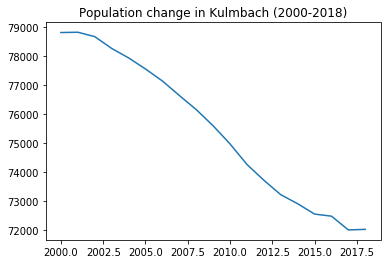

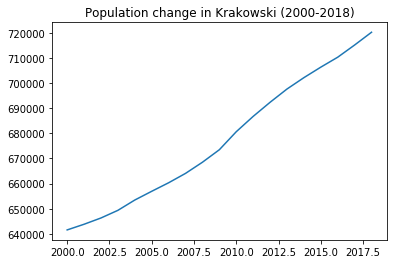

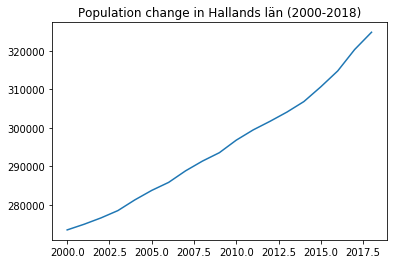

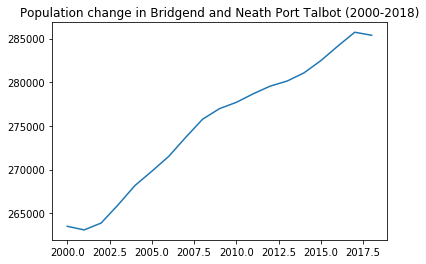

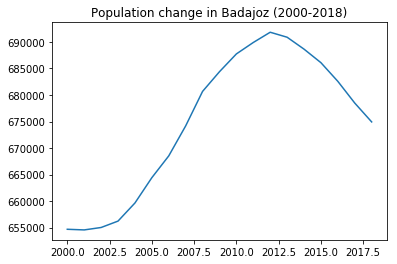

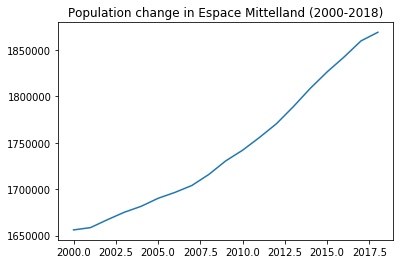

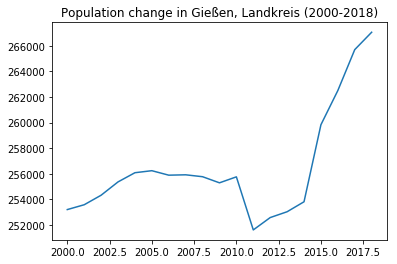

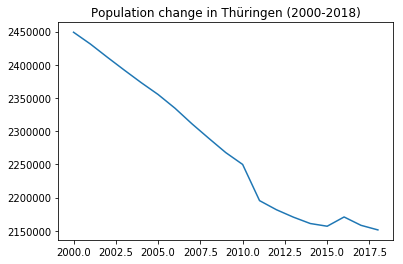

In [20]:
import matplotlib.pyplot as plt

for i in sample.index:
    temp = list(map(lambda x: int(x.replace(',','')), sample.loc[i][0]))
    plt.plot(range(2000,2019),temp)
    title = "Population change in " + data[data['GEO']==i]['GEO_LABEL'].iloc[0]+' (2000-2018)'
    plt.title(title)
    plt.show()

In [21]:
data_dir = "./data/nuts0.csv"
nut0 = pd.DataFrame.from_csv(data_dir, encoding = "ISO-8859-1")

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
GEO,,,,,,,,,,,,,,,,,,,
AL,3058497,3063318,3057018,3044993,3034231,3019634,3003329,2981755,2958266,2936355,2918674,2907361,2903008,2897770,2892394,2885796,2875592,2876591,2870324
AT,8002186,8020946,8063640,8100273,8142573,8201359,8254298,8282984,8307989,8335003,8351643,8375164,8408121,8451860,8507786,8584926,8700471,8772865,8822267
BE,10239085,10263414,10309725,10355844,10396421,10445852,10511382,10584534,10666866,10753080,10839905,11000638,11075889,11137974,11180840,11237274,11311117,11351727,11398589
BG,8190876,8149468,7868815,7805506,7745147,7688573,7629371,7572673,7518002,7467119,7421766,7369431,7327224,7284552,7245677,7202198,7153784,7101859,7050034
CH,7164444,7204055,7255653,7313853,7364148,7415102,7459128,7508739,7593494,7701856,7785806,7870134,7954662,8039060,8139631,8237666,8327126,8419550,8484130


### Nut0 plots

In [37]:
sum(sum(nut0.isnull()[i] for i in nut0.columns))

0

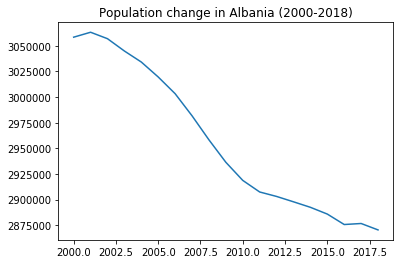

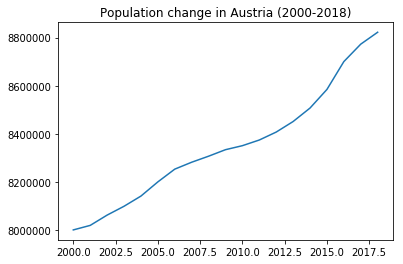

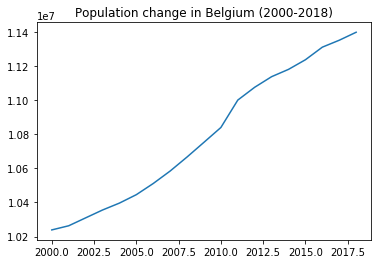

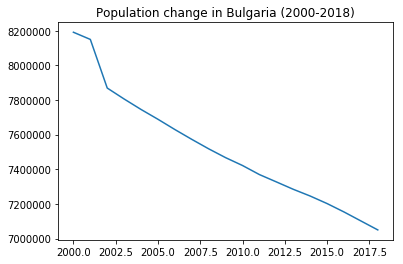

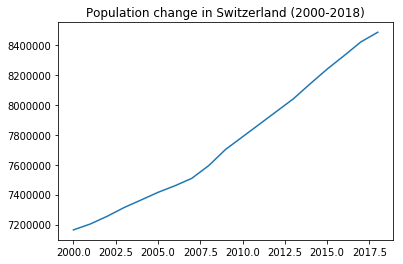

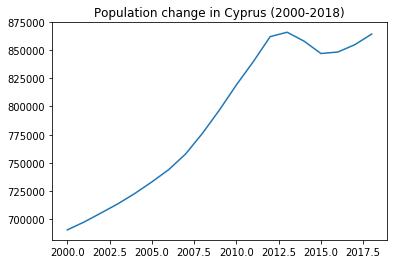

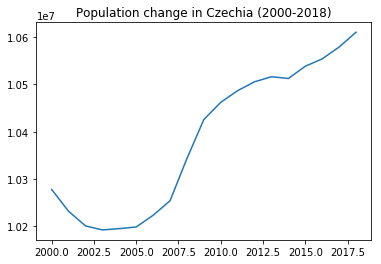

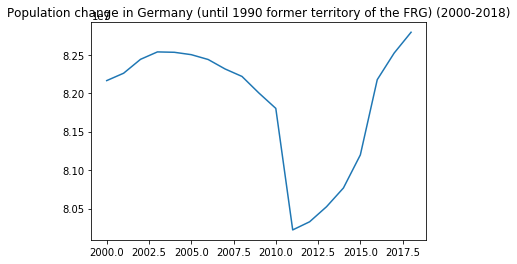

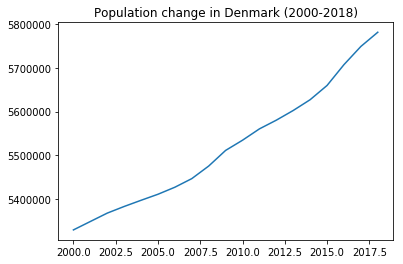

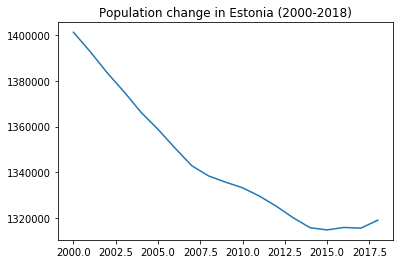

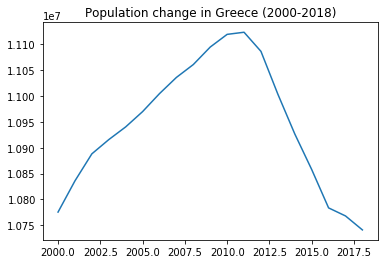

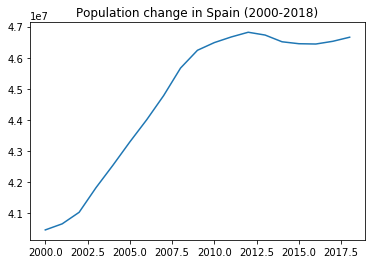

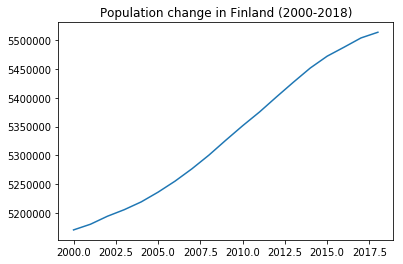

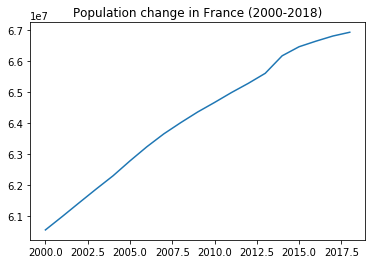

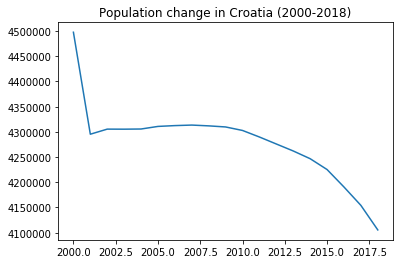

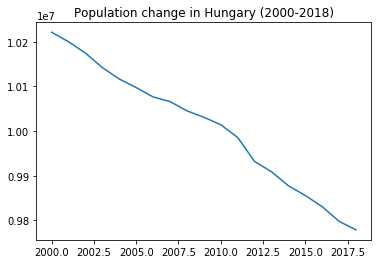

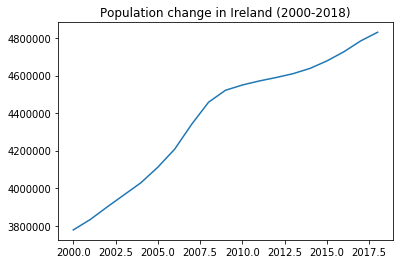

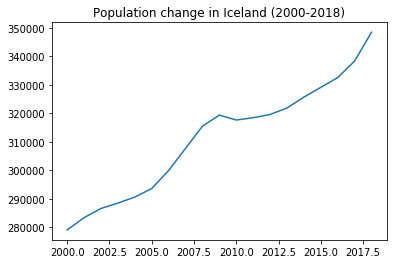

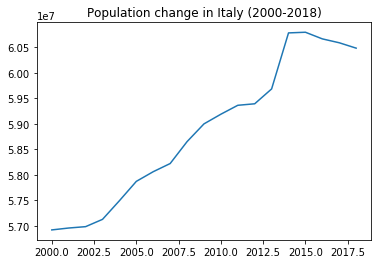

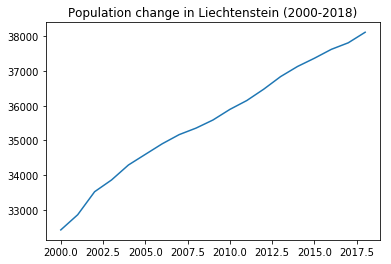

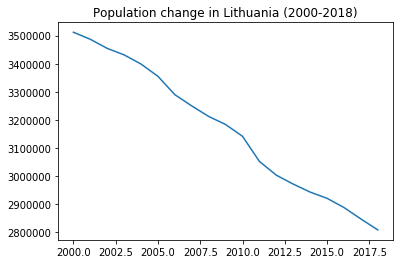

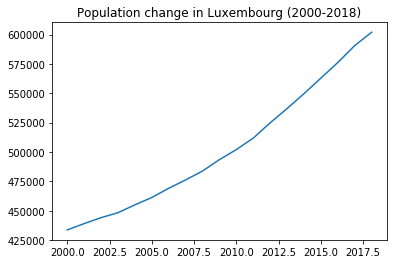

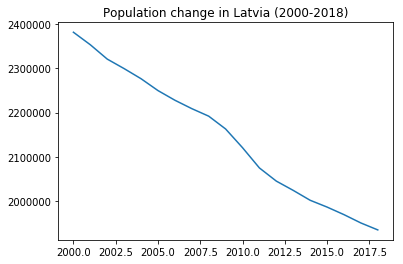

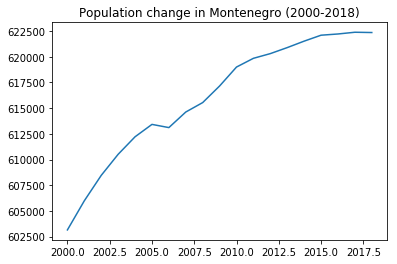

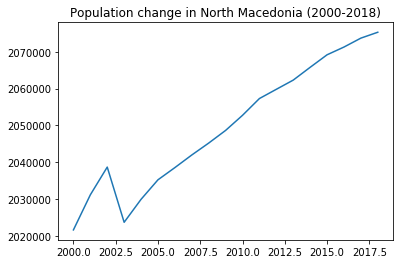

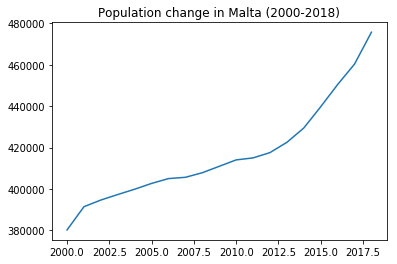

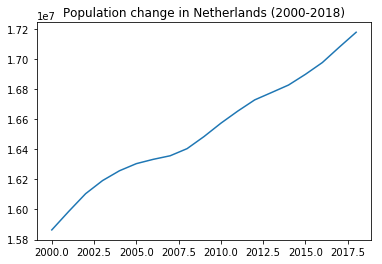

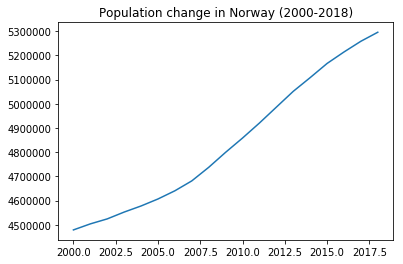

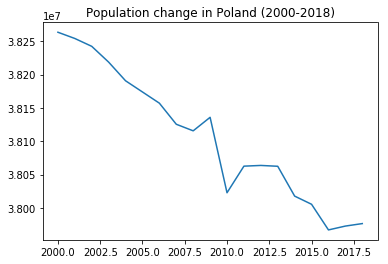

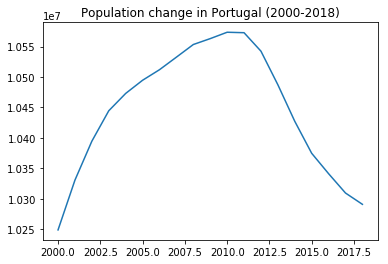

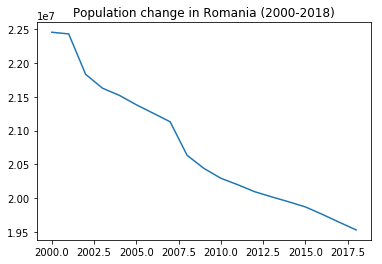

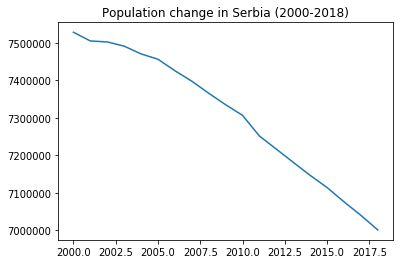

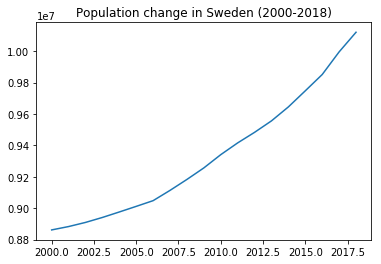

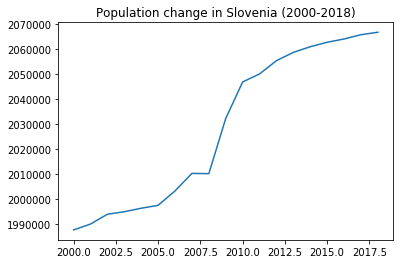

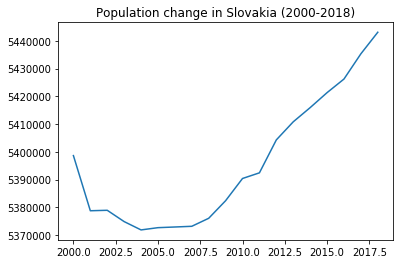

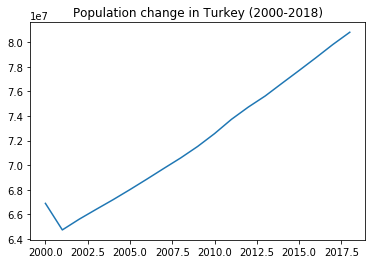

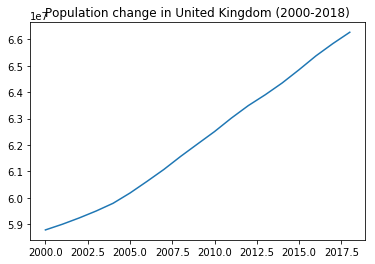

In [30]:
for i in nut0.index:
    temp = nut0.loc[i].values
    plt.plot(range(2000,2019),temp)
    title = "Population change in " + data[data['GEO']==i]['GEO_LABEL'].iloc[0]+' (2000-2018)'
    plt.title(title)
    plt.show()